In [4]:
# modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv('every_ufc_fight_model_ready.csv')

In [5]:
filter_method = [
    'Decision - Unanimous',
    'Decision - Split',
    'Decision - Majority'
    ]

# select only decisions and 3 round fights
df_model = df[(df['method'].isin(filter_method)) & (df['number_of_rounds'] == 3)]

drop_cols = [
    'index',
    'date',
    'event_name',
    'first_fighter_name',
    'second_fighter_name',
    'method',
    'number_of_rounds'
    ]

df_model = df_model.drop(drop_cols, axis=1)
df_model = df_model.dropna(axis=1)

In [41]:
# only differences
df_diff = df_model.copy()

df_diff_first = df_model.filter(like='first').columns
df_diff_second = df_model.filter(like='second').columns

for index, value in enumerate(df_diff_first):
    df_diff[f'diff_{index}'] = df_diff[df_diff_first[index]] - df_diff[df_diff_second[index]]
    
df_diff = df_diff.drop(df_diff_first.append(df_diff_second), axis=1)

In [44]:
# Normalize the data
columns_to_scale = df_diff.columns.drop('winner')
scaler = StandardScaler()
df_diff[columns_to_scale] = scaler.fit_transform(df_diff[columns_to_scale])

X = df_diff.drop('winner', axis=1)
y = df_diff['winner'].astype('category')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8228476821192053
Precision: 0.8295819935691319
Recall: 0.8269230769230769
F1 Score:  0.8282504012841092


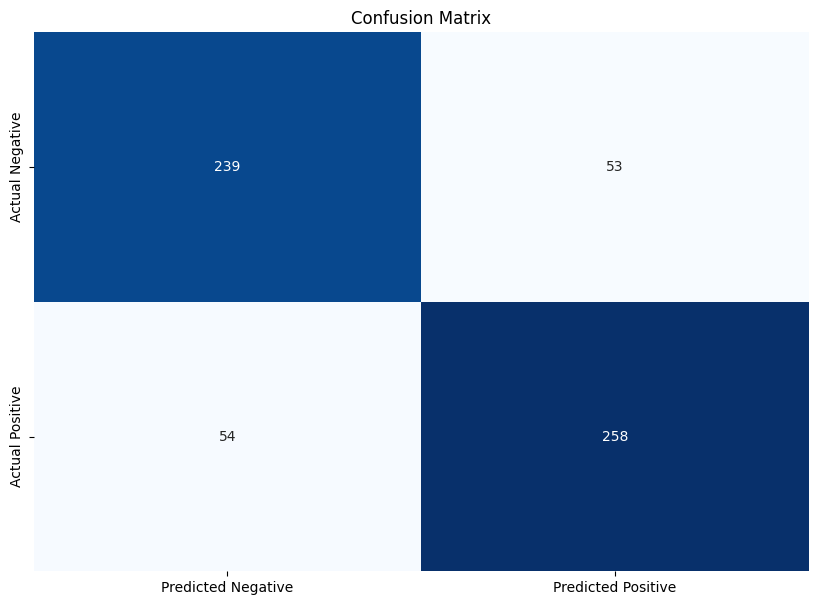

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generate and print confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix to a dataframe for better visualization
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'],
                     index=['Actual Negative', 'Actual Positive'])

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()


In [45]:
# Transform coefficients to odds ratios
odds_ratios = np.exp(model.coef_)

# Create a DataFrame for easy visualization
coef_df = pd.DataFrame({'features': X_train.columns, 'coef': odds_ratios[0]})
# Sort by coef value
coef_df = coef_df.sort_values('coef', ascending=False)

# Display the DataFrame
print(coef_df)

                                    features      coef
2                          first_fighter_STR  9.547261
4                           first_fighter_TD  2.166528
82       first_fighter_round_1_GROUND_landed  1.640387
55   first_fighter_round_3_TOT_STR_attempted  1.589251
73      second_fighter_round_1_LEG_attempted  1.560511
..                                       ...       ...
97      second_fighter_round_2_LEG_attempted  0.690417
33  second_fighter_round_1_TOT_STR_attempted  0.657483
83    first_fighter_round_1_GROUND_attempted  0.610839
5                          second_fighter_TD  0.478799
3                         second_fighter_STR  0.096585

[134 rows x 2 columns]
